# Primera entrega ML

### Precio de la venta de vivienda en Barcelona

### Tema

El objetivo de este proyecto es predecir mediante el uso de diferentes parametros el precio de la vivienda en Barcelona.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Funciones auxiliares
import sys 
sys.path.append('../utils')
import funciones as func

In [2]:
# load dataset
datos = pd.read_csv('../data/processed/df_clean.cvs')
df = datos.copy()

In [3]:
df

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000
...,...,...,...,...,...,...,...,...,...,...
3260,Gràcia,la Vila de Gràcia,needs refurb,Flat,1,64,Yes,exterior,floor 1,295000
3261,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,needs refurb,Flat,3,99,No,exterior,floor 2,420000
3262,Les Corts,la Maternitat i Sant Ramon,needs refurb,Flat,4,127,Yes,exterior,floor 4,545000
3263,Sant Martí,el Parc i la Llacuna del Poblenou,needs refurb,Flat,3,64,No,exterior,ground floor,170000


In [4]:
df.columns

Index(['district', 'neighborhood', 'condition', 'type', 'rooms', 'area_m2',
       'lift', 'views', 'floor', 'prices'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      3265 non-null   object
 1   neighborhood  3265 non-null   object
 2   condition     3265 non-null   object
 3   type          3265 non-null   object
 4   rooms         3265 non-null   int64 
 5   area_m2       3265 non-null   int64 
 6   lift          3265 non-null   object
 7   views         3265 non-null   object
 8   floor         3265 non-null   object
 9   prices        3265 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 255.2+ KB


### Se cuentan 8 variables categoricas y 4 variables enteras. Se observa como no hay ningun valor nulo.

## Se utilizará la variable "prices" como la variable objetivo

In [6]:
# Resumen de estadística descriptiva:
df['prices'].describe()

count    3.265000e+03
mean     6.004200e+05
std      6.522661e+05
min      4.900000e+04
25%      2.799000e+05
50%      4.190000e+05
75%      6.550000e+05
max      1.200000e+07
Name: prices, dtype: float64

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prices', ylabel='Density'>

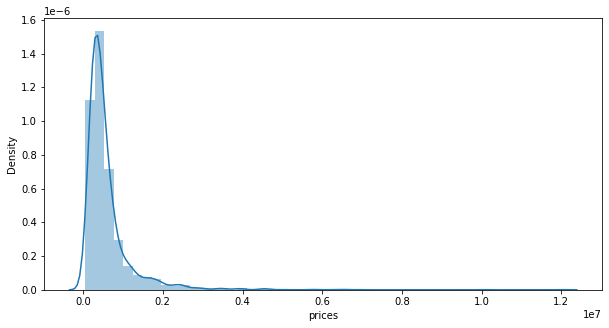

In [7]:
# Histograma:

plt.figure(figsize=(10,5),facecolor='w')
sns.distplot(df['prices'])

A simple vista se pueden apreciar:

* Una desviación con respecto a la distribución normal.
* Algunos picos.

Se observa que la gran mayoria de pisos los 50.000 € y los 200.000 €

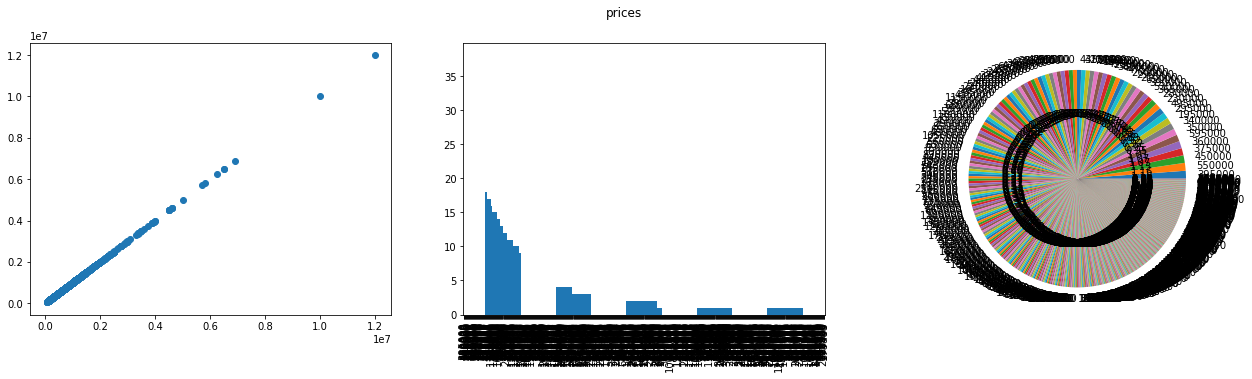

In [8]:
x = 'prices'
func.pintar(df, x)

# A continuacion se analizaran cada una de las variables

In [9]:
df

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000
...,...,...,...,...,...,...,...,...,...,...
3260,Gràcia,la Vila de Gràcia,needs refurb,Flat,1,64,Yes,exterior,floor 1,295000
3261,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,needs refurb,Flat,3,99,No,exterior,floor 2,420000
3262,Les Corts,la Maternitat i Sant Ramon,needs refurb,Flat,4,127,Yes,exterior,floor 4,545000
3263,Sant Martí,el Parc i la Llacuna del Poblenou,needs refurb,Flat,3,64,No,exterior,ground floor,170000


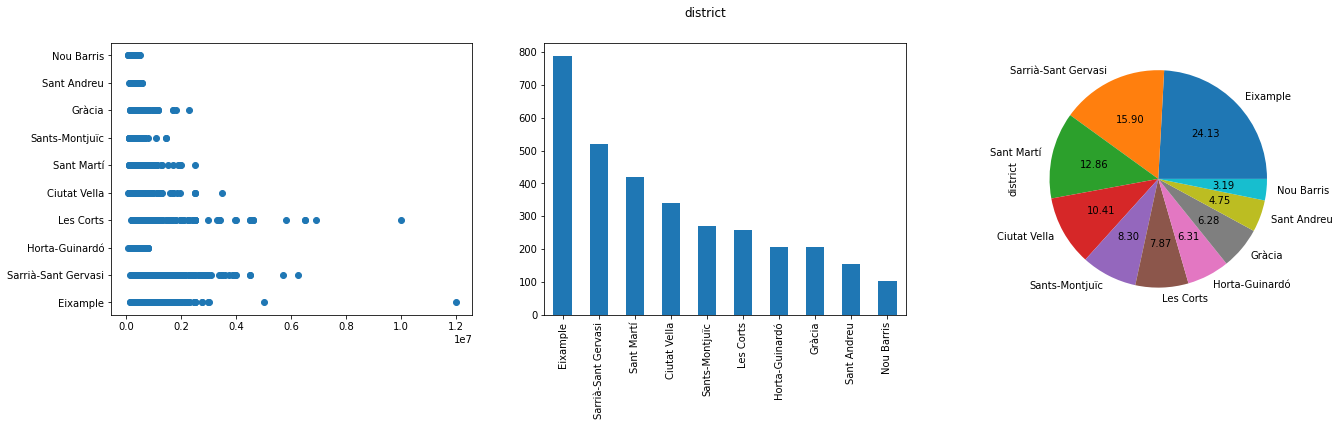

In [10]:
x = 'district'
func.pintar(df, x)

* Los barrios donde más pisos hay son Eixample, Sarrià-Sant Gervasi y Sant Martí
* Los barrios donde más pisos hay son Nou Barris, Sant Andreu, Gràcia

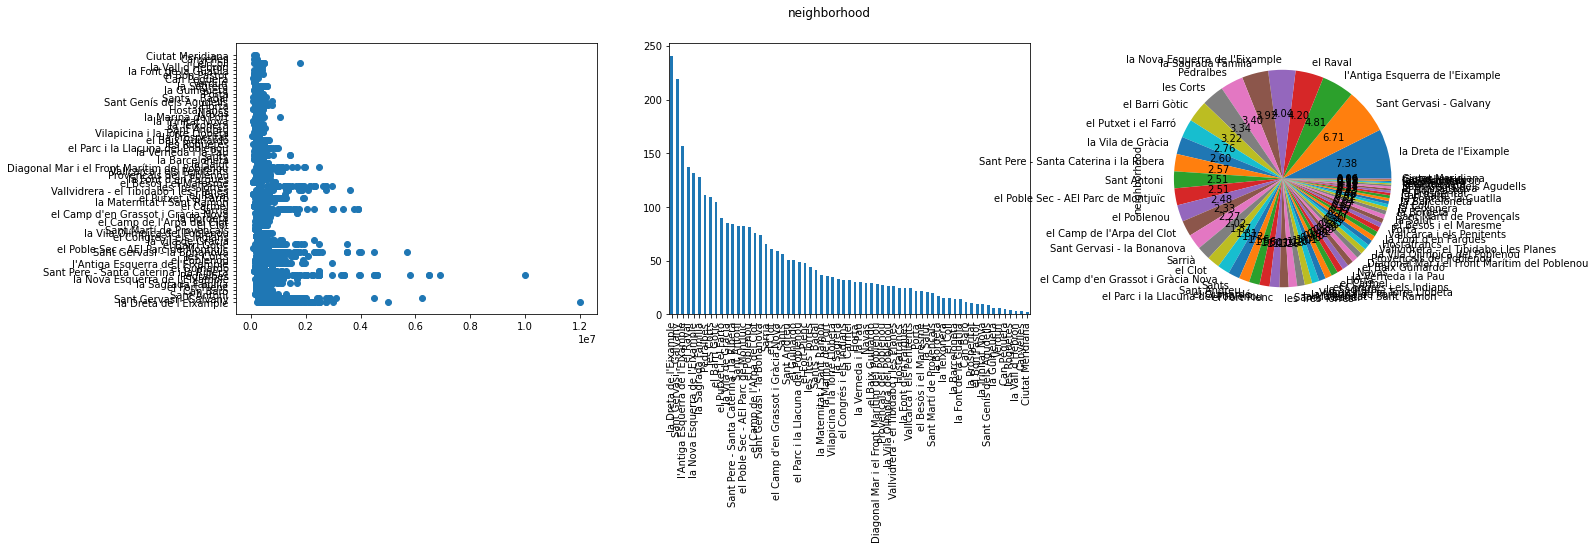

In [11]:
x = 'neighborhood'
func.pintar(df, x)

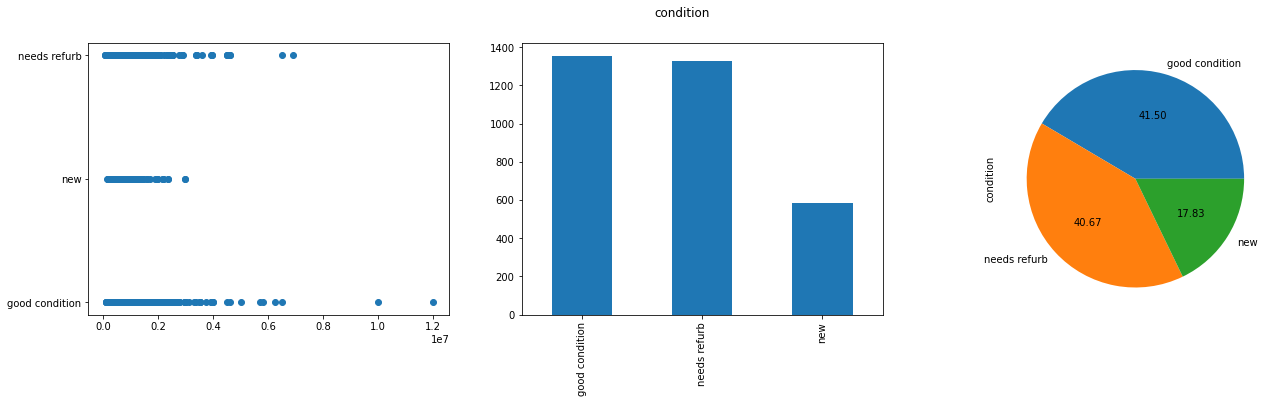

In [12]:
x = 'condition'
func.pintar(df, x)

* Se puede observar como la mayoria de los pisos son pisos en buena condicion y pisos que necesitan reforma, impresiona ver el alto porcentaje de pisos que necesitan reformas. Solo el 17,8% de los pisos en venta en Barcelona son pisos de obra nueva.
 

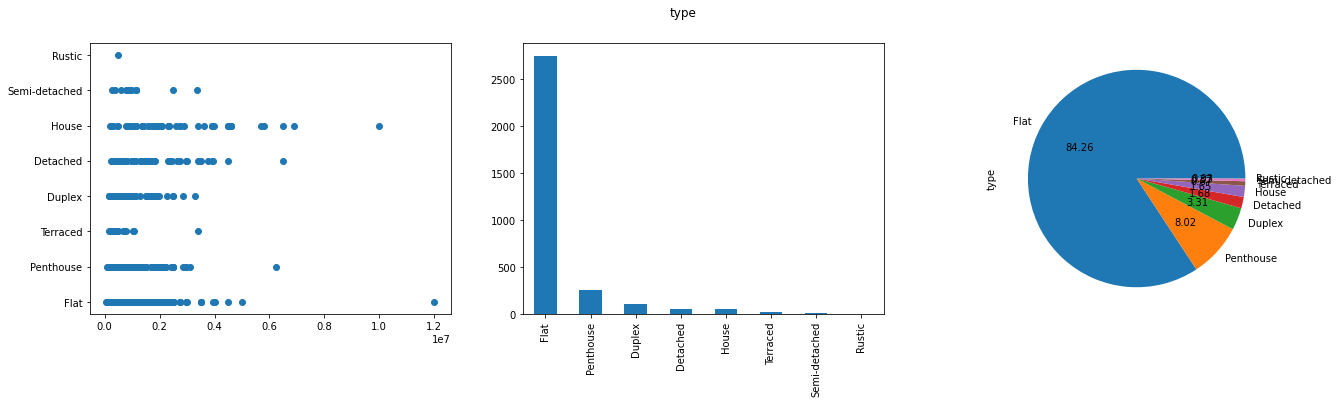

In [13]:
x = 'type'
func.pintar(df, x)

* Se observa claramente como la mayoria de los inmuebles en venta son pisos con el 84,26% seguido lejanamente por la venta de penthouse 8,02% y duplex con 3,31%

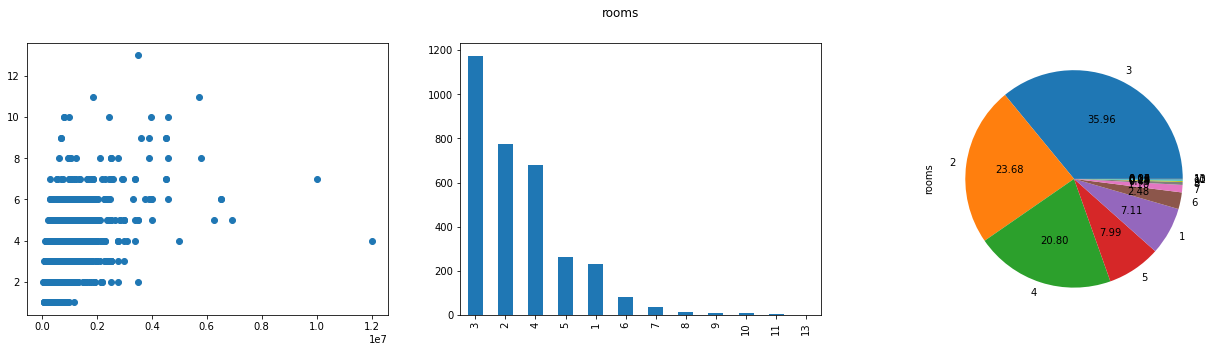

In [14]:
x = 'rooms'
func.pintar(df, x)

* Inmuebles de 3, 2 y 4 habitaciones son mayoria en la venta. Tiene sentido que sean mayoria pues la mayoria de inmuebles en venta son pisos.

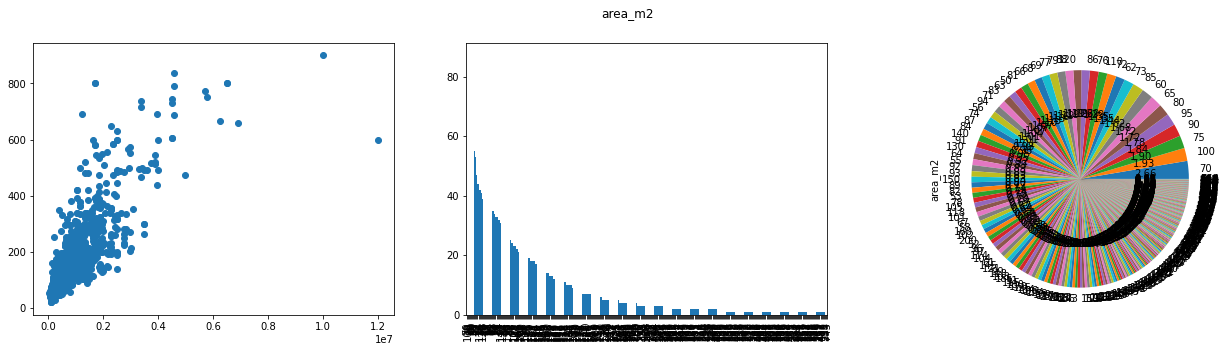

In [15]:
x = 'area_m2'
func.pintar(df, x)

* Como es de esperar la mayoria de inmuebles se encuentran en inmuebles con menos m2 y tambien se puede ver como cuantos mas m2 tenga el inmueble mayor será su precio

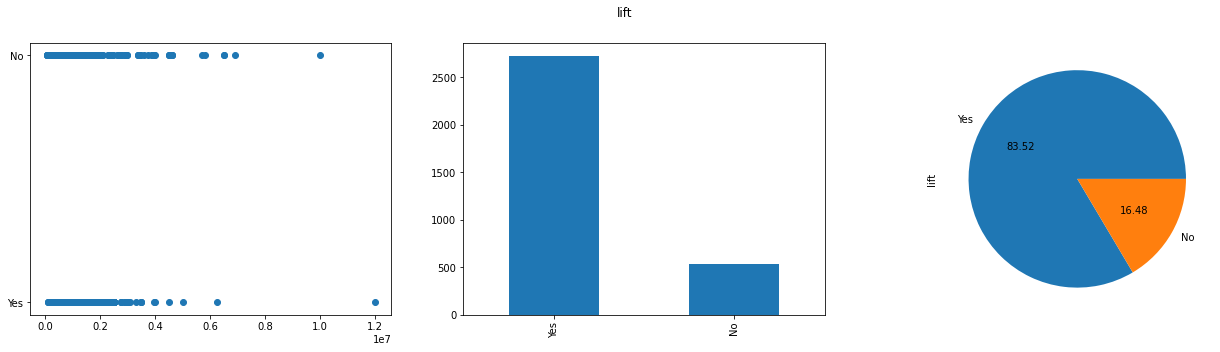

In [16]:
x = 'lift'
func.pintar(df, x)

* El 83.52% de inmuebles tienen ascensor, esperable pues la mayoria de los inmuebles son pisos.

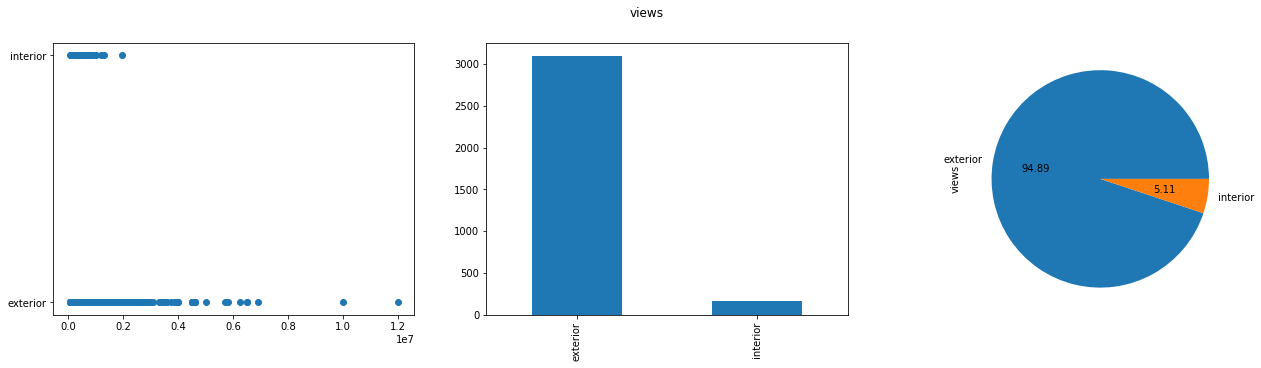

In [17]:
x = 'views'
func.pintar(df, x)

* El 94.89% tiene vistas al exterior, a la calle.

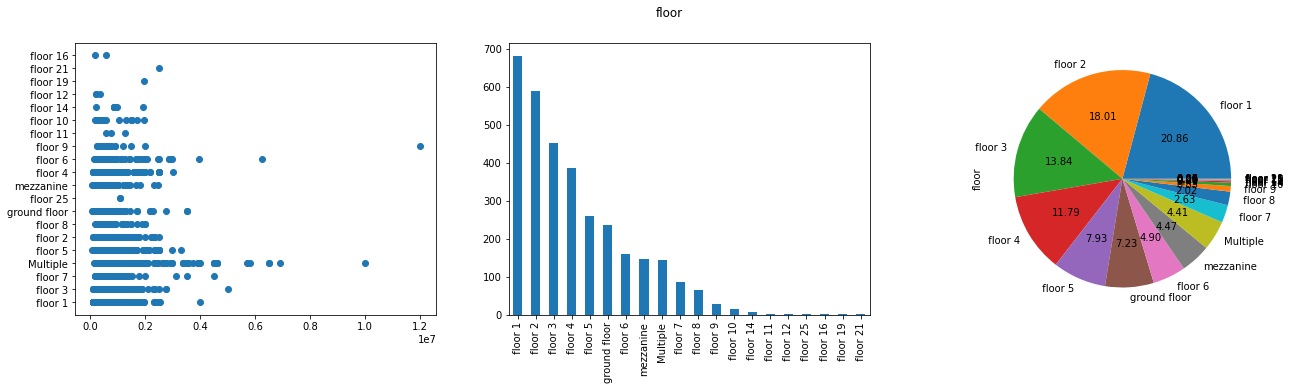

In [18]:
x = 'floor'
func.pintar(df, x)

* El 50% de los inmuebles se encuentran entre la planta 1 y 3 ambas inclusive

# Ahora se analizara la correlación de las variables

In [19]:
estadistico, p_value = shapiro(df.prices)
print('Estadistico=%.3f, p_value=% f' % (estadistico, p_value))

Estadistico=0.564, p_value= 0.000000


* Se utilizará el método Spearman pues el valor de p_valor esta por debajo de 0.05

<AxesSubplot:>

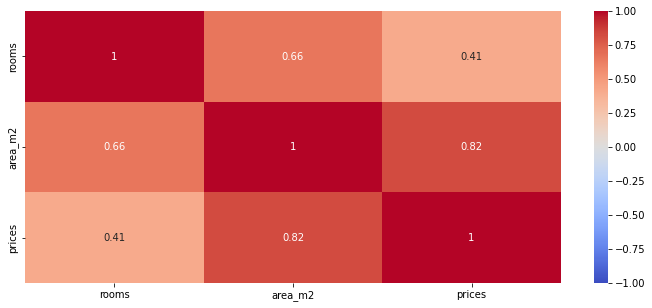

In [20]:
plt.figure(figsize=(12, 5), facecolor='w')
sns.heatmap(df.corr(method='spearman'), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

* Como solo se tienen 3 variables numericas no se puede obsevar la correlacion real y completa de los datos.

### Se convierten las variables categoricas a numericas para observa mejor la correlación netre las variables y realizar de forma correcta los modelos de predicción.

In [10]:
func.encoder(df)
df.to_csv('../data/processed/df_processed.cvs')
df

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,1,45,0,2,3,351,1,0,0,2300000
1,9,14,0,2,5,298,1,0,10,1750000
2,1,12,0,4,2,90,1,0,14,590000
3,1,45,0,2,2,130,1,0,0,450000
4,3,0,0,7,3,110,0,0,17,430000
...,...,...,...,...,...,...,...,...,...,...
3260,2,61,1,2,1,64,1,0,0,295000
3261,0,17,1,2,3,99,0,0,7,420000
3262,4,50,1,2,4,127,1,0,11,545000
3263,7,37,1,2,3,64,0,0,18,170000


<AxesSubplot:>

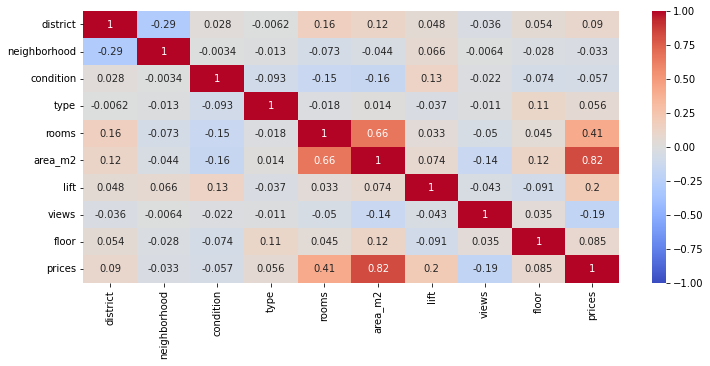

In [22]:
plt.figure(figsize=(12, 5), facecolor='w')
sns.heatmap(df.corr(method='spearman'), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

* Las variables que mas relacion tiene con la variable objetivo son: area_m2, habitaciones, si tienen o no ascensor seguidas del distrino en el que se encuentran y la planta del inmueble.